# Loss Functions in Pytorch

## Regression Loss Functions
- nn.MSELoss (Mean Squared Error Loss)
- nn.L1Loss (Mean Absolute Error Loss)
- nn.SmoothL1Loss (Huber Loss)

## Classification Loss Functions
- nn.CrossEntropyLoss (Softmax + Negative Log Likelihood Loss)
- nn.NLLLoss (Negative Log Likelihood Loss)
- nn.BCELoss (Binary Cross Entropy Loss)
- nn.BCEWithLogitsLoss (Binary Cross Entropy with Logits)

## Ranking Loss Functions
- nn.MarginRankingLoss
- nn.TripletMarginLoss
- nn.CosineEmbeddingLoss

## Other Specialized Loss Functions
- nn.HingeEmbeddingLoss
- nn.KLDivLoss (Kullback-Leibler Divergence Loss)
- nn.MultiLabelSoftMarginLoss
- nn.HuberLoss

# Regression Loss Functions

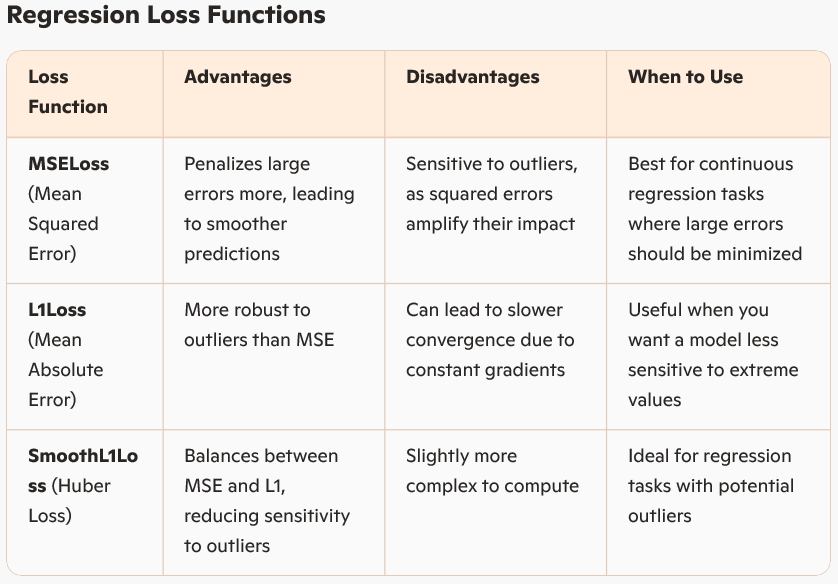

In [2]:
from IPython.display import Image

Image("data/reg_loss.png")  # Local file

In [1]:
import torch
from torch import nn

input = torch.randn(2,4, requires_grad=True)
target = torch.randn(2,4)

# MSE
# torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')
mse_loss = nn.MSELoss()
mse_output = mse_loss(input, target)
mse_output.backward()
print(mse_output)

# L1 Loss or MAE (mean absolute error)
# torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')
l1_loss = nn.L1Loss()
l1_output = l1_loss(input, target)
l1_output.backward()
print(l1_output)

# Huber Loss - Smooth L1 Loss
# torch.nn.HuberLoss(reduction='mean', delta=1.0)
h_loss = nn.HuberLoss()
h_output = h_loss(input, target)
h_output.backward()
print(h_output)

tensor(2.2892, grad_fn=<MseLossBackward0>)
tensor(1.1792, grad_fn=<MeanBackward0>)
tensor(0.8306, grad_fn=<HuberLossBackward0>)


# Classification Loss Functions

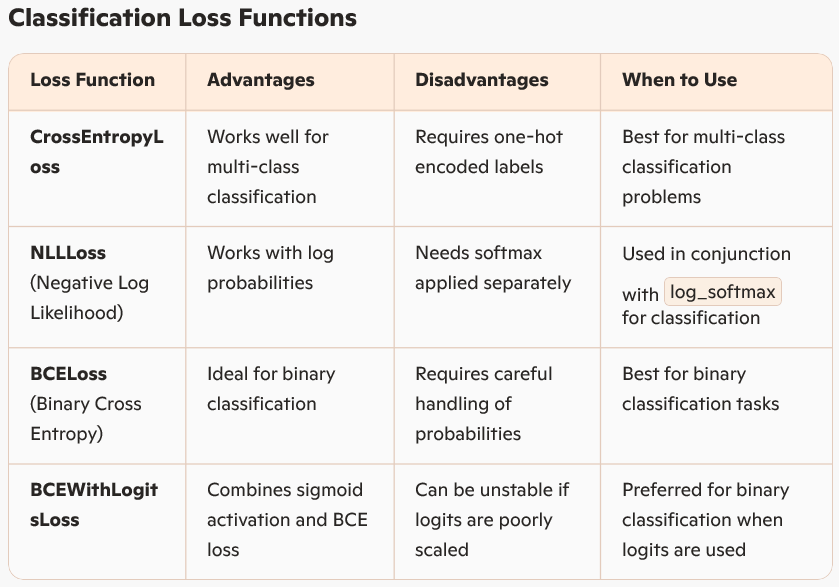

In [3]:
from IPython.display import Image

Image("data/classification_loss.png")  # Local file

In [5]:
import torch
from torch import nn

input = torch.randn(2,4, requires_grad=True)
target = torch.empty(2, dtype=torch.long).random_(4)

# Cross Entropy Loss
# torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=- 100, 
#                            reduce=None, reduction='mean', label_smoothing=0.0)
cross_loss = nn.CrossEntropyLoss()
c_output = cross_loss(input, target)
c_output.backward()
print(c_output)

# Negative Likelihood Loss NLLLoss
# torch.nn.NLLLoss(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean')
m = nn.LogSoftmax(dim=1)
nll_loss = nn.NLLLoss()
nll_output = nll_loss(m(input), target)
nll_output.backward()
print(nll_output)

# Binary Cross Entropy
# torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)  # Binary targets (0 or 1)
m = nn.Sigmoid()
bce_loss = nn.BCELoss()
bce_output = bce_loss(m(input),target)
bce_output.backward()
print(bce_output)

# BSE with Logits loss
# torch.nn.BCEWithLogitsLoss(weight=None, size_average=None, 
#                            reduce=None, reduction='mean', pos_weight=None)
loss = nn.BCEWithLogitsLoss()
output = loss(input, target)
output.backward()
print(output)

tensor(1.4727, grad_fn=<NllLossBackward0>)
tensor(1.4727, grad_fn=<NllLossBackward0>)
tensor(0.5196, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5196, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


# Ranking Loss Functions

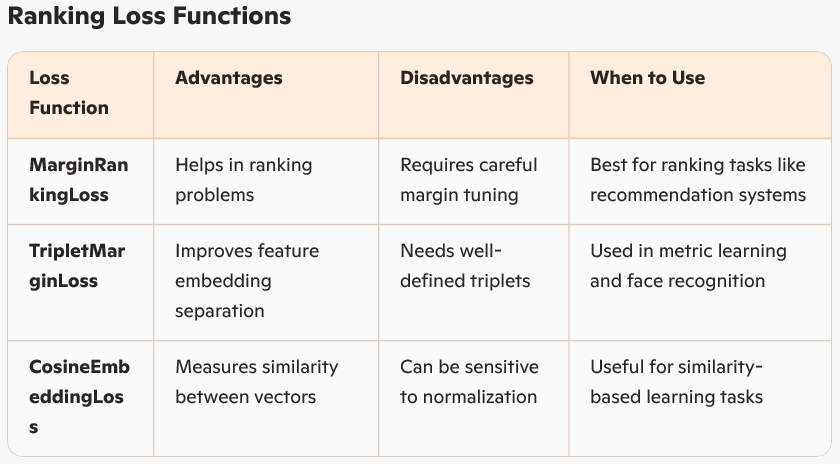

In [6]:
from IPython.display import Image

Image("data/ranking_loss.png")  # Local file

In [10]:
import torch
import torch.nn as nn

# Margin Ranking Loss
# torch.nn.MarginRankingLoss(margin=0.0, size_average=None, reduce=None, reduction='mean')
# Sample inputs
x1 = torch.randn(3, requires_grad=True)
x2 = torch.randn(3, requires_grad=True)
target = torch.tensor([1, -1, 1])  # 1 means x1 should be ranked higher than x2
loss = nn.MarginRankingLoss(margin=1.0)
output = loss(x1, x2, target)
output.backward()
print(output)

# Triplet Margin Loss
# torch.nn.TripletMarginLoss(margin=1.0, p=2, eps=1e-6, swap=False, 
#                             size_average=None, reduce=None, reduction='mean')
# Sample inputs
anchor = torch.randn(3, requires_grad=True)
positive = torch.randn(3, requires_grad=True)
negative = torch.randn(3, requires_grad=True)
loss = nn.TripletMarginLoss(margin=1.0)
output = loss(anchor, positive, negative)
output.backward()
print(output)

# Cosine Embedding Loss
# torch.nn.CosineEmbeddingLoss(margin=0.0, size_average=None, reduce=None, reduction='mean')
# Sample inputs
x1 = torch.randn(1, 3, requires_grad=True)  # Shape [1, 3] and requires gradients
x2 = torch.randn(1, 3, requires_grad=True)  # Shape [1, 3] and requires gradients
target = torch.tensor([1])  # Keep it 1D with batch_size elements
loss = nn.CosineEmbeddingLoss(margin=0.5)
output = loss(x1, x2, target)
output.backward()
print(output)

tensor(1.1223, grad_fn=<MeanBackward0>)
tensor(1.4819, grad_fn=<MeanBackward0>)
tensor(0.4193, grad_fn=<MeanBackward0>)


# Other Loss Functions

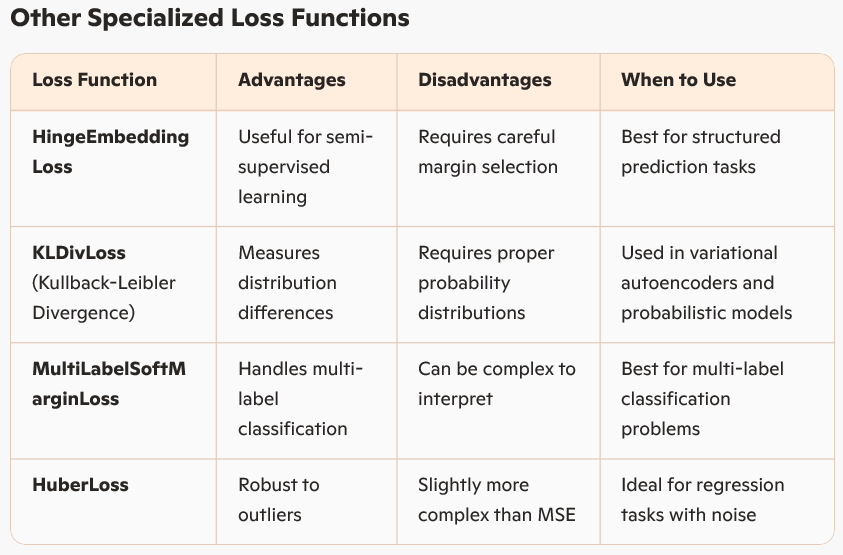

In [11]:
from IPython.display import Image

Image("data/other_loss.png")  # Local file

In [14]:
import torch
import torch.nn as nn

# Hinge Embedding Loss
# torch.nn.HingeEmbeddingLoss(margin=1.0, size_average=None, reduce=None, reduction='mean')
# Sample inputs
x = torch.randn(3, requires_grad=True)
target = torch.tensor([1, -1, 1])  # 1 means positive class, -1 means negative class
loss = nn.HingeEmbeddingLoss(margin=1.0)
output = loss(x, target)
output.backward()
print(output)

# KLDiv Loss
# torch.nn.KLDivLoss(size_average=None, reduce=None, reduction='batchmean', log_target=False)
# Sample inputs (log probabilities)
input = torch.log_softmax(torch.randn(3, requires_grad=True), dim=0)
target = torch.tensor([0.2, 0.5, 0.3])  # Target probability distribution
loss = nn.KLDivLoss(reduction='batchmean')
output = loss(input, target)
output.backward()
print(output)

# Multi Label Soft Margin Loss
# torch.nn.MultiLabelSoftMarginLoss(weight=None, size_average=None, reduce=None, reduction='mean')
# Sample inputs
input = torch.randn(3, requires_grad=True)
target = torch.tensor([1, 0, 1], dtype=torch.float32)  # Multi-label targets
loss = nn.MultiLabelSoftMarginLoss()
output = loss(input, target)
output.backward()
print(output)

tensor(0.3913, grad_fn=<MeanBackward0>)
tensor(0.0006, grad_fn=<DivBackward0>)
tensor(1.3289, grad_fn=<MeanBackward0>)
